<a href="https://colab.research.google.com/github/gcmillar/CEUS/blob/master/gcmillar_CEUS_JupyterNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
#        **Space-time Analytics of Human Physiology for Urban Planning**
---
---

This is code and data for computational reproducibility accompanying the following paper:

> **Garrett C. Millar**, Ondrej Mitas, Wilco Boode Lisette Hoeke, Joost de Kruijff, Anna Petrasova, Helena Mitasova (2020): 
Space-time Analytics of Human Physiology for Urban Planning. In: Computers, Environment, and Urban Sytstems, In: *Advances in portable sensing methodologies for urban environments: Understanding cities from a mobility perspective*. 


<center>
  <img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/viewshed_progress_onedir_ortho.png" alt="runbutton" height="180px">
</center>

[![DOI](https://zenodo.org/badge/234817300.svg)](https://zenodo.org/badge/latestdoi/234817300)

# Table of Contents

---
- [Space-time Analytics of Human Physiology for Urban Planning](#scrollTo=hcqShGttHsb2)

  *  [Table of Contents](#scrollTo=5Xi0WE1VA7oz)

  *  [Code](#scrollTo=uLnyFCClJn6F)

  *  [Things to Know](#scrollTo=-i2K8lJ4J1z4)

  *  [Setup & Imports](#scrollTo=eRwEVbK3LaXX)

    + [GDAL & Colaboratory Notebooks](#scrollTo=3UewP07YeyjZ)

    +   [Install GDAL in R](#scrollTo=AvGtTNhMfhVU)

- [Software: R](#scrollTo=PZk_VvpuKf0F)

    + [Install Required R Packages](#scrollTo=n9t-PhSneJ-H)

  *  [Data Processing](#scrollTo=2OV72uepLixb)

    + [Artifact Correction](#scrollTo=eTFxJNzJLufO)

        + [Joining](#scrollTo=iUlGnMdvYSko)

    + [Identifying Cycle Highway Directions](#scrollTo=ZaUNk_NKhMgT)

    + [Skin Conductance](#scrollTo=ZWLfza5-Yf3l)

- [Spatial Data](#scrollTo=tI2tuAZEbvWQ)

  *  [Processing & Transformation](#scrollTo=Msp57oPXJ8R6)

  *  [Processing & Export for Interactive Application - Stress3d](#scrollTo=SWFB0G1uYEf3)

  *  [Exporting as Vector to GRASS](#scrollTo=MbZGnHMkYEf0)

- [Software: GRASS GIS](#scrollTo=oC2lpaBs3Q8D)

  *  [Install](#scrollTo=vSy1KNtghIxl)

  *  [CEUS Data — GRASS GIS](#scrollTo=DExWI9fwO6Lr)

    +  [Elevation](#scrollTo=DExWI9fwO6Lr)

    +  [Land Use](#scrollTo=DExWI9fwO6Lr)

    + [Download CEUS Location Dataset](#scrollTo=-ydwDKOAhZzc)

  *  [Configure Python to Run GRASS](#scrollTo=sLCc64a_z-rv)

- [Analyses](#scrollTo=Qgy56fCTrx0L)

  *  [Distance to Roads](#scrollTo=9k6luw1l6xAJ)

  *  [Viewshed Analysis](#scrollTo=TB4_hakk5Zqi)

    + [Parallelization in Python](#scrollTo=JSIi-rm0FkI8)

  *  [Viewshed Results](#scrollTo=T-fBJIJEDiuU)

  *  [Final Export of Data](#scrollTo=KfINmNCEZGw8)

  *  [Statistical Modeling](#scrollTo=UEOfNFaqG1WM)
---

# Code
This is a modified version of a notebook for reproducibility of the applied methodological framework applied in the Millar et al. 2020 paper. The entire repository is available at https://github.com/gcmillar/CEUS, and the full original Jupyter Notebook is available at https://colab.research.google.com/github/gcmillar/CEUS/blob/master/PeopleEnvironmentGrassGIS.ipynb

The tools implementing the published methods are available at [GRASS GIS 7 Addons Manual pages](https://grass.osgeo.org/grass7/manuals/addons/). More importantly, the version of _r.viewshed_<sup>[1](https://grass.osgeo.org/grass76/manuals/r.viewshed.html)</sup>&nbsp;&nbsp;(used in Section: [_Viewshed Analysis_](#scrollTo=TB4_hakk5Zqi)) is available for compilation as a dev package at the [OSGeo GRASS Github page](https://github.com/OSGeo/grass). This version of _r.viewshed_ was specially developed for the viewshed analyses presented in the Millar et al. 2020 paper, detailed in the code contained this notebook.

<br/>

<br/>

<table class="tfo-notebook-buttons" align="center" text-decoration="none">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/gcmillar/CEUS/blob/master/gcmillar_CEUS_Space_time_analytics_JupyterNB.ipynb
    "><img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/colab_logo_32px.png" />Run in Google Colab</a>&nbsp;&nbsp;&nbsp;
  </td>
  <td>
    <a target="_blank" href="https://github.com/gcmillar/CEUS/blob/master/gcmillar_CEUS_JupyterNB.ipynb"><img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/GitHub-Mark-26px.png" />View source on GitHub</a>
  </td>
    <td>
    <a href="https://drive.google.com/a/ncsu.edu/uc?authuser=0&id=1L7p5i_xBsYkw1Dav0iiDvahSuxKCaJ0i&export=download"><img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/download_logo_32px.png" />Download notebook</a>
  </td>
</table>
<br/>


---

## Things to Know 
* Click play button in upper left corner of code window to run code chunk: <img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/codebutton.png" alt="runbutton" width="14" height="14">
<!-- ![alt text](https://raw.githubusercontent.com/gcmillar/CEUS/master/img/codebutton.png "Logo Title Text 1") -->

* Code cells with long computational times: <img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/wait_time.png" alt="runbutton" width="25" height="25">

* For those unfamiliar with Jupyter Notebook and/or Google Colab:
  - [What is Jupyter Notebook](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html)?
  - [What is Google Colab?](https://www.tutorialspoint.com/google_colab/what_is_google_colab.htm)
  - [Google Colab Quick Guide](https://www.tutorialspoint.com/google_colab/google_colab_quick_guide.htm)


## Setup & Imports

Download any needed Jupter Notebook extensions:

In [0]:
%%capture
!jupyter nbextension install --user https://rawgithub.com/minrk/ipython_extensions/master/nbextensions/toc.js
!curl -L https://rawgithub.com/minrk/ipython_extensions/master/nbextensions/toc.css > $(jupyter --data-dir)/nbextensions/toc.css

Hide warnings and unecessary output:

In [0]:
import warnings
# warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

Increase output window size (mostly useful for figures):

In [0]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

<IPython.core.display.Javascript object>

###R
#### R Magic

Very needed step, load cell magic for R, where then each R-script cell is begun with: `%%R`  

In [0]:
%%capture
%load_ext rpy2.ipython 
# activate R magic

#### GDAL in R

In [0]:
%%capture
%%R
install.packages("rgdal")
library(rgdal);

### GDAL & Colaboratory Notebooks 

Need to setup the colaboratory notebook with GDAL, to be used in R. As this will be running on a ubuntu server, run 
*   `apt-get update`
*   `apt-get install libgdal-dev` 
    *   run this before trying to install GDAL otherwise you will get errors.
    * The flag -y accepts the download and runs – this is the longest part (but not too long)
*   Install python-gdal again with the -y flag
*   Install NumPy and SciPy (not compulsory, but why not?)
*   Test the installation by importing GDAL. No error? It should be ok.

> **NOTE**: <img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/wait_time.png" alt="runbutton" width="25" height="25">

In [0]:
%%capture
#Step 1
!apt-get update
#Step 2
!apt-get install libgdal-dev -y
#Step 3
!apt-get install python-gdal -y
#Step 4
!apt-get install python-numpy python-scipy -y
#Step 5
import gdal 

### Pandas

In [0]:
%%capture
import pandas as pd

# Software: **R**

---

<!-- <mark>**NEED TO UPDATE/FINALIZE OVERARCHING SECTION DESCRIPTION HERE**</mark>

> e.g. -
_We had to do preprocessing to get the data from this state to this state. Preprocessing consisted of these main components. Then we finish with this product which is passed on to the next portion of the analysis (which looks like the spatial data bit based on table of contents) which is also performed using R. Then when you get to the spatial data bit, reign the user back in with an update on where you are, what software you're using, and what the goal of the next chunk is._ -->

### Install Required R Packages 
> **NOTE**: <img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/wait_time.png" alt="runbutton" width="25" height="25">

In [0]:
%%capture
%%R
options(digits = 8)
if (!require(dplyr)) {install.packages("dplyr"); library(dplyr)}
if (!require(tidyr)) {install.packages("tidyr"); library(tidyr)}
if (!require(sp)) {install.packages("sp"); library(sp)}
if (!require(raster)) {install.packages("raster"); library(raster)}
if (!require(rgeos)) {install.packages("rgeos"); library(rgeos)}
if (!require(rgbif)) {install.packages("rgbif"); library(rgbif)}
if (!require(viridis)) {install.packages("viridis"); library(viridis)}
if (!require(gridExtra)) {install.packages("gridExtra"); library(gridExtra)}
if (!require(R.matlab)) {install.packages("R.matlab"); library(R.matlab)}
if (!require(plyr)) {install.packages("plyr"); library(plyr)}
if (!require(data.table)) {install.packages("data.table"); library(data.table)}
if (!require(maptools)) {install.packages("maptools"); library(maptools)}
if (!require(spatstat)) {install.packages("spatstat"); library(spatstat)}
if (!require(rasterVis)) {install.packages("rasterVis"); library(rasterVis)}
if (!require(leaflet)) {install.packages("leaflet"); library(leaflet)}
if (!require(RColorBrewer)) {install.packages("RColorBrewer"); library(RColorBrewer)}
if (!require(scales)) {install.packages("scales"); library(scales)}
if (!require(spgwr)) {install.packages("spgwr"); library(spgwr)}
if (!require(gdalUtils)) {install.packages("gdalUtils"); library(gdalUtils)}
if (!require(devtools)) {install.packages("devtools"); library(devtools)}
if (!require(tidyverse)) {install.packages("tidyverse"); library(tidyverse)}
if (!require(sf)) {install.packages("sf"); library(sf)}
if (!require(ggmap)) {install.packages("ggmap"); library(ggmap)}
if (!require(formatR)) {install.packages("formatR"); library(formatR)}
if (!require(stats)) {install.packages("stats"); library(stats)}
if (!require(data.table)) {install.packages("data.table"); library(data.table)}
if (!require(lubridate)) {install.packages("lubridate"); library(lubridate)}
if (!require(ggplot2)) {install.packages("ggplot2"); library(ggplot2)}
if (!require(grid)) {install.packages("grid"); library(grid)}
if (!require(gridExtra)) {install.packages("gridExtra"); library(gridExtra)}
if (!require(lattice)) {install.packages("lattice"); library(lattice)}
if (!require(leaflet)) {install.packages("leaflet"); library(leaflet)}
if (!require(lme4)) {install.packages("lme4"); library(lme4)}
if (!require(corrgram)) {install.packages("corrgram"); library(corrgram)}
if (!require(psych)) {install.packages("psych"); library(psych)}
if (!require(egg)) {install.packages("egg"); library(egg)}

## Data Processing

Read in CEUS Initial Cyclist Data [.csv]; using [online link from GitHub](https://raw.githubusercontent.com/gcmillar/CEUS/master/CHIPS_all.csv):

> **File Description**: Initial dataset for CEUS analysis (.csv of cyclists' location and physiological data) 

> **Note**: This data is read in under the assumption the raw skin conductance signals have been properly processed in Ledalab--MATLAB-based software for the analysis of raw EDA data. This process used a moving window of 20 seconds to identify deviations of 3 standard deviations or more as potential motion artifacts. Deviations were visually inspected and if they failed to conform to a standard, physiologically-plausible shape for a Skin Conductance Response (SCR), were replaced with linear interpolation. Cleaned data were then deconvoluted using the Ledalab toolbox into phasic and tonic components. After deconvolution, we can now proceed with the data representing the phasic component, where the physiological data are georeferenced through a time-based synchronization of the SCR data with GPS location data.
<!-- ~~~ -->
 <!-- **File Description**: Initial dataset for CEUS analysis (.csv of cyclists' location and physiological data)  -->
<!-- ~~~ -->


In [0]:
%%capture
# import csv
!wget "https://raw.githubusercontent.com/gcmillar/CEUS/master/CHIPS_all.csv"
CHIPS_url = 'https://raw.githubusercontent.com/gcmillar/CEUS/master/CHIPS_all.csv'
CHIPS_df = pd.read_csv(CHIPS_url) # Dataset is now stored in a Pandas Dataframe

Using Pandas to display CHIPS cycling data as interactive table.

In [0]:
%%R
setwd("/content/")
CHIPS_df <- read.table("CHIPS_all.csv", header = TRUE, row.names=NULL, sep=",")
# setnames(CHIPS_df, "long", "lon")

In [0]:
%load_ext google.colab.data_table
CHIPS_df

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,participant,time,conductance,conductance_z,phasic,phasic_z,tonic,tonic_z,lat,lon,altitude,distance,speed,speed2,power
0,1,0.00,0.793927,-1.301833,0.066628,0.009995,0.727299,-1.311828,51.694545,5.046148,2.0,0.0,0.0,0.0,0.0
1,1,0.25,0.797768,-1.301205,0.070469,0.010623,0.727299,-1.311828,51.694545,5.046148,2.0,0.0,0.0,0.0,0.0
2,1,0.50,0.793927,-1.301833,0.066711,0.010000,0.727216,-1.311833,51.694545,5.046148,2.0,0.0,0.0,0.0,0.0
3,1,0.75,0.793927,-1.301833,0.066902,0.010014,0.727025,-1.311847,51.694545,5.046148,2.0,0.0,0.0,0.0,0.0
4,1,1.00,0.795207,-1.301624,0.068477,0.010246,0.726730,-1.311869,51.694545,5.046148,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196567,12,4199.00,2.797048,0.346290,0.269639,0.309222,2.527409,0.037068,51.694313,5.045239,17.0,0.0,0.0,0.0,0.0
196568,12,4199.25,2.775272,0.320891,0.247880,0.283845,2.527392,0.037046,51.694313,5.045239,17.0,0.0,0.0,0.0,0.0
196569,12,4199.50,2.759901,0.302963,0.232528,0.265940,2.527373,0.037023,51.694313,5.045239,17.0,0.0,0.0,0.0,0.0
196570,12,4199.75,2.773991,0.319397,0.246637,0.282398,2.527354,0.036999,51.694313,5.045239,17.0,0.0,0.0,0.0,0.0


In [0]:
%unload_ext google.colab.data_table

### Artifact Correction
The script and descriptions below detail the process of removing the first and last 4.00% of the raw skin conductance data to correct for artifacts: 
Using time, we know 4.00% of `max(CHIPS_df$time)` is `max(CHIPS_df$time) * 0.040` seconds. So, we'll delete the first and last `max(CHIPS_df$time) * 0.040` seconds (or `max(CHIPS_df$time) * 0.040 / 60` 
minutes) in the data to remove the observed artifacts. Since the data was collected every 0.25 seconds, that means `round(max(CHIPS_df$time) * 0.040 * 4)` rows should be deleted at the beginning and end of the data set.

In [0]:
%%R
unique(CHIPS_df$participant)
# keeping specific pt data
CHIPS_pts <- CHIPS_df
# data needs to first be separated by participants to remove artifacts 
pt1 <- CHIPS_pts[CHIPS_pts$participant == 1, ]
pt2 <- CHIPS_pts[CHIPS_pts$participant == 2, ]
pt3 <- CHIPS_pts[CHIPS_pts$participant == 3, ]
pt4 <- CHIPS_pts[CHIPS_pts$participant == 4, ]
pt5 <- CHIPS_pts[CHIPS_pts$participant == 5, ]
pt6 <- CHIPS_pts[CHIPS_pts$participant == 6, ]
pt7 <- CHIPS_pts[CHIPS_pts$participant == 7, ]
pt8 <- CHIPS_pts[CHIPS_pts$participant == 8, ]
pt9 <- CHIPS_pts[CHIPS_pts$participant == 9, ]
pt10 <- CHIPS_pts[CHIPS_pts$participant == 10, ]
pt11 <- CHIPS_pts[CHIPS_pts$participant == 11, ]
pt12 <- CHIPS_pts[CHIPS_pts$participant == 12, ]

In [0]:
%%R
# first rows
N <- round(max(CHIPS_pts$time) * 0.040 * 4)
pt1 <- pt1[-(1:N), , drop = FALSE]
pt2 <- pt2[-(1:N), , drop = FALSE]
pt3 <- pt3[-(1:N), , drop = FALSE]
pt4 <- pt4[-(1:N), , drop = FALSE]
pt5 <- pt5[-(1:N), , drop = FALSE]
pt6 <- pt6[-(1:N), , drop = FALSE]
pt7 <- pt7[-(1:N), , drop = FALSE]
pt8 <- pt8[-(1:N), , drop = FALSE]
pt9 <- pt9[-(1:N), , drop = FALSE]
pt10 <- pt10[-(1:N), , drop = FALSE]
pt11 <- pt11[-(1:N), , drop = FALSE]
pt12 <- pt12[-(1:N), , drop = FALSE]
# last rows
N.2 <- round(max(CHIPS_pts$time) * 0.040 * 4)
pt1 <- pt1[1:(nrow(pt1)-N.2),]
pt2 <- pt2[1:(nrow(pt2)-N.2),]
pt3 <- pt3[1:(nrow(pt3)-N.2),]
pt4 <- pt4[1:(nrow(pt4)-N.2),]
pt5 <- pt5[1:(nrow(pt5)-N.2),]
pt6 <- pt6[1:(nrow(pt6)-N.2),]
pt7 <- pt7[1:(nrow(pt7)-N.2),]
pt8 <- pt8[1:(nrow(pt8)-N.2),]
pt9 <- pt9[1:(nrow(pt9)-N.2),]
pt10 <- pt10[1:(nrow(pt10)-N.2),]
pt11 <- pt11[1:(nrow(pt11)-N.2),]
pt12 <- pt12[1:(nrow(pt12)-N.2),]

### Joining 
All participant data that were just separated and cleaned by using time are re-included into the same data frame.

In [0]:
%%R
# join
CHIPS_df_clean <- rbind(pt1, pt2, pt3, pt4, pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12)
CHIPS_df_clean <- add_count(CHIPS_df_clean, lon, lat, name = "data.points.n")
CHIPS_df_clean$lon.lat <- paste(CHIPS_df_clean$lon, CHIPS_df_clean$lat, sep=",")
CHIPS_time.in.cell <- aggregate(time ~ lat + lon, data = CHIPS_df_clean, sum)

### Identifying Cycle Highway Directions

<!-- <mark>**Should this code be included, since the resulting charts didn't end up making the paper?**</mark> -->

Half participants went Waalwijk --> Tilburg, other half went Tilburg --> Waalwijk:
*   `Waalwijk --> Tilburg: 1, 3, 4, 10, 11, 12`
*   `Tilburg --> Waalwijk: 2, 5, 6, 7, 8, 9`

> Groups need to be split for proper GPS data visualiztion

In [0]:
%%R
CHIPS_df_clean$direction <- NA
CHIPS_df_clean$direction[which(CHIPS_df_clean$participant %in% c(1, 3, 4, 10, 11, 12))] <- "waal_til"
CHIPS_df_clean$direction[which(CHIPS_df_clean$participant %in% c(2, 5, 6, 7, 8, 9))] <- "til_waal"
CHIPS_df_clean$direction <- as.factor(CHIPS_df_clean$direction)
CHIPS_waal_til <- subset(CHIPS_df_clean, direction=="waal_til")
CHIPS_til_waal <- subset(CHIPS_df_clean, direction=="til_waal")

###Skin Conductance
---

**Although this portion of the analysis did not appear in the final manuscript, it is very useful for initial data exploration. Therefore, code to generate initial exploratory plots of skin conductance, as a function of multiple relevant variables (speed, elevation, etc.), is included below.**

---





Plotting SCR data as a function of elevation and speed by time stamps of each way point using ggplot. This helps examine potentially confounding effects between variables.

As to not confuse ggplot, we do not pass the SpatialPointsDataFrame-object directly, but convert it to a regular data frame with as.data.frame():

> **NOTE**: <img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/wait_time.png" alt="runbutton" width="25" height="25">

First, we explore skin conductance by plotting overall cycling time (in seconds) on the x-axis.

#### Plot of Time & Elevation, Colored by Skin Conductance

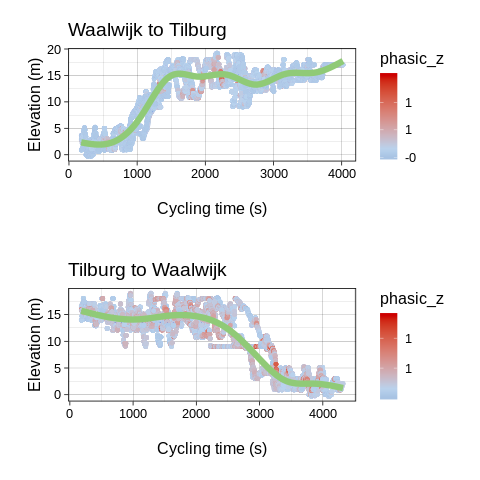

In [0]:
%%R
if (!require(egg)) {install.packages("egg"); library(egg)}
options(digits = 0) # restricting decimal places for graphs
# CHIPS_waal_til
time_elev_conduct_plot.waal_til <- ggplot(as.data.frame(CHIPS_waal_til), # convert to regular dataframe
                                          aes(x=time, y=altitude, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3",
                        midpoint = median(CHIPS_df$phasic_z),
                        breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080"),
        legend.title = element_blank()) +
  theme_linedraw(base_size = 16) +
  geom_point(alpha = 0.6, size = 1.5, show.legend = TRUE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
   # theme_bw() + 
   ggtitle("Waalwijk to Tilburg") +
  labs(x='\nCycling time (s)', y='Elevation (m)')
# CHIPS_til_waal
CHIPS_til_waal[order(CHIPS_til_waal$distance),]
CHIPS_til_waal$participant[1:50]
time_elev_conduct_plot.til_waal <- ggplot(as.data.frame(CHIPS_til_waal), # convert to regular dataframe
            aes(x=time, y=altitude, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
                       midpoint = median(CHIPS_df$phasic_z),
                       breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  # theme(panel.grid.major = element_line(colour = "#808080"))
  theme(panel.grid.major = element_line(colour = "#808080"),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = rel(0.5)))+
  theme_linedraw(base_size = 16) +
  geom_point(alpha = 0.6, size = 1.5, show.legend = TRUE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
  ggtitle("Tilburg to Waalwijk") +
  labs(x='\nCycling time (s)', y='Elevation (m)')
# together
grid.arrange(grobs=lapply(list(time_elev_conduct_plot.waal_til, time_elev_conduct_plot.til_waal), set_panel_size,
                          width = unit(4, "in")))

#### Plot of Time & Speed, Colored by Skin Conductance

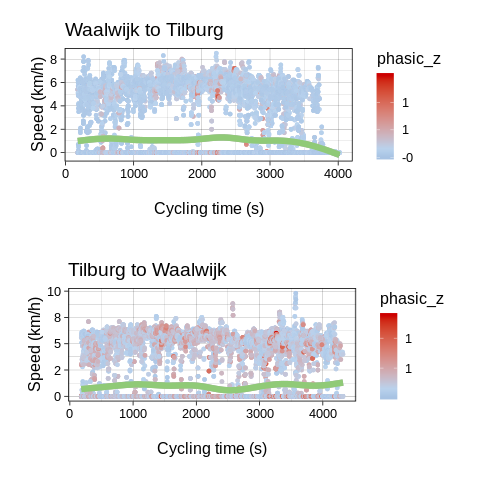

In [0]:
%%R
# CHIPS_waal_til
time_speed_conduct_plot.waal_til <- ggplot(as.data.frame(CHIPS_waal_til), # convert to regular dataframe
                                          aes(x=time, y=speed, color = phasic_z)) +
  geom_smooth(span = 0.3, colour="darkgray", size=3, alpha=0.6) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
                        midpoint = median(CHIPS_df$phasic_z),
                        breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080"),
        legend.title = element_blank()) +
  theme_linedraw(base_size = 16) +
  geom_point(alpha = 0.6, size = 1.5, show.legend = TRUE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
   # theme_bw() + 
   ggtitle("Waalwijk to Tilburg") +
  labs(x='\nCycling time (s)', y='Speed (km/h)')
# CHIPS_til_waal
time_speed_conduct_plot.til_waal <- ggplot(as.data.frame(CHIPS_til_waal), # convert to regular dataframe
            aes(x=time, y=speed, color = phasic_z)) +
  geom_smooth(span = 0.3, colour="darkgray", size=3, alpha=0.6) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
                       midpoint = median(CHIPS_df$phasic_z),
                       breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080"),
        legend.title = element_blank()) +
  theme_linedraw(base_size = 16) +
  geom_point(alpha = 0.6, size = 1.5, show.legend = TRUE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
  ggtitle("Tilburg to Waalwijk") +
  labs(x='\nCycling time (s)', y='Speed (km/h)')
# together
grid.arrange(grobs=lapply(list(time_speed_conduct_plot.waal_til, time_speed_conduct_plot.til_waal), set_panel_size,
                          width = unit(4, "in")))

**NOTE**
* Instead of Time on the x-axis, we further explore the Skin Conductance data by plotting over Distance (in km). 
  
* Since our cyclists used e-bikes, we can expect the plots to look similar to those above which were plotted over Time (i.e., cyclists maintained a constant pace throughout their cycling trip).

#### Plot of Distance & Elevation, Colored by Skin Conductance

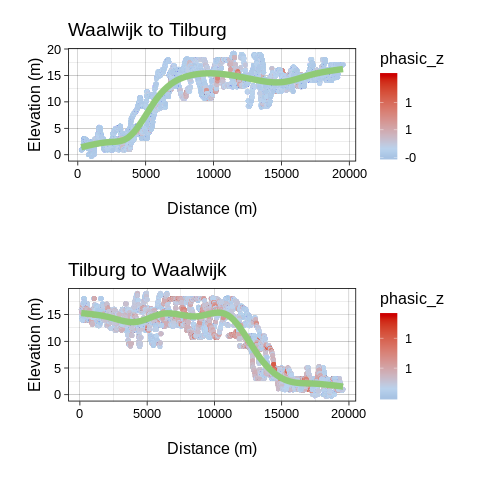

In [0]:
%%R
# first elevation
CHIPS_waal_til <- subset(CHIPS_waal_til, distance>=100)
dist_elev_conduct_plot.waal_til <- ggplot(as.data.frame(CHIPS_waal_til), # convert to regular dataframe
                                          aes(x=distance, y=altitude, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3",
                        midpoint = median(CHIPS_df$phasic_z),
                        breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
 theme(panel.grid.major = element_line(colour = "#808080"),
        legend.title = element_blank()) +
  theme_linedraw(base_size = 16) +
  geom_point(alpha = 0.6, size = 1.5, show.legend = TRUE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
   # theme_bw() + 
   ggtitle("Waalwijk to Tilburg") +
  labs(x='\nDistance (m)', y='Elevation (m)')
# CHIPS_til_waal
CHIPS_til_waal <- subset(CHIPS_til_waal, distance>=100)
dist_elev_conduct_plot.til_waal <- ggplot(as.data.frame(CHIPS_til_waal), # convert to regular dataframe
            aes(x=distance, y=altitude, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
                       midpoint = median(CHIPS_df$phasic_z),
                       breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080"),
        legend.title = element_blank()) +
  theme_linedraw(base_size = 16) +
  geom_point(alpha = 0.6, size = 1.5, show.legend = TRUE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
  ggtitle("Tilburg to Waalwijk") +
  labs(x='\nDistance (m)', y='Elevation (m)')
# together
grid.arrange(grobs=lapply(list(dist_elev_conduct_plot.waal_til,dist_elev_conduct_plot.til_waal), set_panel_size,
                          width = unit(4, "in")))

#### Plot of Distance & Speed, Colored by Skin Conductance

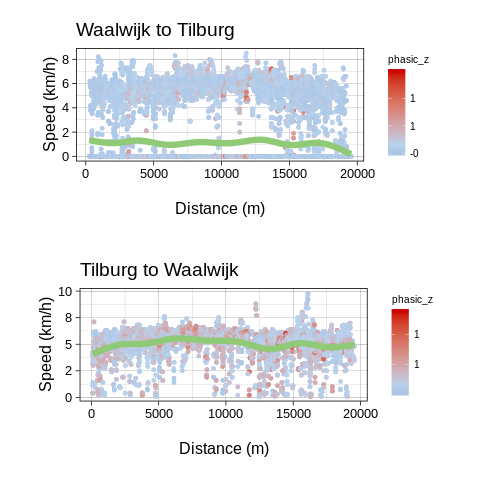

In [0]:
%%R
dist_speed_conduct_plot.waal_til <- ggplot(as.data.frame(CHIPS_waal_til), # convert to regular dataframe
                                          aes(x=distance, y=speed, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3",
                        midpoint = median(CHIPS_df$phasic_z),
                        breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
    theme(panel.grid.major = element_line(colour = "#808080"),
        legend.title = element_blank()) +
  theme_linedraw(base_size = 16) +
  geom_point(alpha = 0.6, size = 1.5, show.legend = TRUE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
  theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 10)) +
   # theme_bw() + 
   ggtitle("Waalwijk to Tilburg") +
  labs(x='\nDistance (m)', y='Speed (km/h)')
# CHIPS_til_waal
CHIPS_til_waal <- subset(CHIPS_til_waal, speed>0)
dist_speed_conduct_plot.til_waal <- ggplot(as.data.frame(CHIPS_til_waal), # convert to regular dataframe
            aes(x=distance, y=speed, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
                       midpoint = median(CHIPS_df$phasic_z),
                       breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080"),
        legend.title = element_blank()) +
  theme_linedraw(base_size = 16) +
  geom_point(alpha = 0.6, size = 1.5, show.legend = TRUE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
  theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 10)) +
  ggtitle("Tilburg to Waalwijk") +
  labs(x='\nDistance (m)', y='Speed (km/h)')
# together
grid.arrange(grobs=lapply(list(dist_speed_conduct_plot.waal_til,dist_speed_conduct_plot.til_waal), set_panel_size,
                          width = unit(4, "in")))

# Spatial Data 
For spatial analyses to occur, the data frame needs to be converted into a spatial data frame. The functions `coordinates()` and `projection()` from `sp` library converts the dataset into spatial objects that our to-be-conducted analyses requires. 

In particular, `coordinates()` specifies the latitude and longitude of the data and `proj4string()` creates the projection layer, i.e. the coordinate system. As you know, the EPSG: 4326 means that the coordinates are latitude-longitude pairs on a reference ellipsoid given by WGS84, projected with Mercator Projection.


## Processing & Transformation

In [0]:
%%R
# Data Processing
CHIPS_lonlat_sp <- CHIPS_df_clean
# First, ensuring a default long / lat is assigned to the coordinates:
## Specifying coordinates in raw data
coordinates(CHIPS_lonlat_sp) <- ~ lon + lat
## Setting default projection
proj4string(CHIPS_lonlat_sp) <- CRS("+init=epsg:4326 +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs +towgs84=0,0,0")
# Then, transform the coordinates to UTM, using its proper CRS [EPSG:28992; RD / Amersfoort].
## Transforming coordinates to UTM
CHIPS_sp <- spTransform(CHIPS_lonlat_sp, "+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 +k=0.9999079 +x_0=155000 +y_0=463000 +ellps=bessel +units=m +no_defs")
# Creating specific participant data frames
pt1 <- CHIPS_sp[CHIPS_sp$participant == 1, ]
pt2 <- CHIPS_sp[CHIPS_sp$participant == 2, ]
pt3 <- CHIPS_sp[CHIPS_sp$participant == 3, ]
pt4 <- CHIPS_sp[CHIPS_sp$participant == 4, ]
pt5 <- CHIPS_sp[CHIPS_sp$participant == 5, ]
pt6 <- CHIPS_sp[CHIPS_sp$participant == 6, ]
pt7 <- CHIPS_sp[CHIPS_sp$participant == 7, ]
pt8 <- CHIPS_sp[CHIPS_sp$participant == 8, ]
pt9 <- CHIPS_sp[CHIPS_sp$participant == 9, ]
pt10 <- CHIPS_sp[CHIPS_sp$participant == 10, ]
pt11 <- CHIPS_sp[CHIPS_sp$participant == 11, ]
pt12 <- CHIPS_sp[CHIPS_sp$participant == 12, ]
# inspect resulting data
print(CHIPS_lonlat_sp)

class       : SpatialPointsDataFrame 
features    : 179292 
extent      : 5, 9, 48, 52  (xmin, xmax, ymin, ymax)
crs         : +init=epsg:4326 +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs +towgs84=0,0,0 
variables   : 16
names       : participant, time, conductance, conductance_z,      phasic,     phasic_z,       tonic,    tonic_z, altitude, distance, speed, speed2,      power, data.points.n,             lon.lat, ... 
min values  :           1,  180,           0,       -2.5374, -0.37180026, -0.058124676, -0.74559546, -2.5564633,     -0.3,        0,     0,      0, -3006.6372,             1, 5.0447518,51.694212, ... 
max values  :          12, 4320,   89.340683,     4.3944985,   9.8752154,    2.0113978,   88.751455,  3.6022169,     19.2,  19561.5,   9.8,  35.28,  2702.3866,          3406,   8.6246694,47.9631, ... 


## Processing & Export for Interactive Application - Stress3d

Using the same approach above for the web-mapping application, Stress3d. Mapbox, and web-mapping in general, requires standard latitude and longitude coordinates [EPSG:4326; WGS 84]. Exporting to GeoJSON format, also usually preferred by web-mapping applications.

In [0]:
%%R
library(rgdal)
CHIPS_lonlat <- CHIPS_df
coordinates(CHIPS_lonlat) <- ~ lon + lat
# Setting default projection
proj4string(CHIPS_lonlat) <- CRS('+proj=longlat +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs')
pt1 <- CHIPS_lonlat[CHIPS_lonlat$participant == 1, ]
pt2 <- CHIPS_lonlat[CHIPS_lonlat$participant == 2, ]
pt3 <- CHIPS_lonlat[CHIPS_lonlat$participant == 3, ]
pt4 <- CHIPS_lonlat[CHIPS_lonlat$participant == 4, ]
pt5 <- CHIPS_lonlat[CHIPS_lonlat$participant == 5, ]
pt6 <- CHIPS_lonlat[CHIPS_lonlat$participant == 6, ]
pt7 <- CHIPS_lonlat[CHIPS_lonlat$participant == 7, ]
pt8 <- CHIPS_lonlat[CHIPS_lonlat$participant == 8, ]
pt9 <- CHIPS_lonlat[CHIPS_lonlat$participant == 9, ]
pt10 <- CHIPS_lonlat[CHIPS_lonlat$participant == 10, ]
pt11 <- CHIPS_lonlat[CHIPS_lonlat$participant == 11, ]
pt12 <- CHIPS_lonlat[CHIPS_lonlat$participant == 12, ]
# Exporting to GeoJSON
writeOGR(CHIPS_lonlat, "/content/CHIPS_all_pts.geojson",
         layer="CHIPS_lonlat", driver="GeoJSON")
# Exporting sample GeoJSON for display
# writeOGR(pt3, "/content/pt3.geojson",
#          layer="pt3", driver="GeoJSON")


<iframe width="560" height="315" src="https://gcmillar.github.io/e-motion/" frameborder="0" allowfullscreen></iframe>



In [0]:
%%html
<iframe src="https://gcmillar.github.io/stress3d/" width="1200" height="800"></iframe>

## Exporting as Vector to GRASS
The following computes a csv file designed to be seamlessly imported into GRASS. Coordinates are in UTM [EPSG:28992; RD / Amersfoort] format, csv separator is set to pipe ("|" - GRASS's default import setting).  

In [0]:
%%R
# ALL
chips_all <- CHIPS_sp@data[,1:13]
chips_all$lon <-CHIPS_sp@coords[,1]
chips_all$lat <-CHIPS_sp@coords[,2]
write.table(chips_all, row.names = F, quote = F, 
            col.names = T, sep = "|", dec = ".",
           "/content/chips_all.txt")

---

# Software: **GRASS GIS**

---

GRASS GIS (https://grass.osgeo.org/) is a Geographic Information System used for geospatial data management and analysis, image processing, graphics/map production, spatial modeling, and visualization.

<!-- <mark>**NEED TO UPDATE/FINALIZE OVERARCHING SECTION DESCRIPTION HERE**</mark> -->


## Install 
**Source**<sup> [1](https://grasswiki.osgeo.org/wiki/GRASS_GIS_Jupyter_notebooks)</sup> 

When the following code chunk is run, you will see a rectangular input box pop up below. Click in it using your mouse, and then press 'Enter' to continue the configuration process.

> **NOTE**: <img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/wait_time.png" alt="runbutton" width="25" height="25">

In [0]:
%%capture
!add-apt-repository ppa:ubuntugis/ubuntugis-unstable
#update packages
!apt-get update
#install grass
!apt-get install grass -y;

## Configure Python to Run GRASS



In [0]:
# import Python standard library and IPython packages we need
import os
import sys
import subprocess
from IPython.display import Image

# ask GRASS GIS where its Python packages are
gisbase= "/usr/lib/grass78"
# gisbase = subprocess.check_output(["grass78", "--config", "path"]).strip()
print(gisbase)
os.environ['GISBASE'] = gisbase
sys.path.append(os.path.join("/usr/lib/grass78", "etc", "python"))

# import GRASS GIS packages we need
import grass.script as gs
import grass.script.setup as gsetup

# create GRASS GIS session
rcfile = gsetup.init(gisbase, "/root/grassdata", "CEUS", "PERMANENT")

# we want functions to raise exceptions and see standard output of the modules
gs.set_raise_on_error(True)
gs.set_capture_stderr(True)

# simply overwrite existing maps like we overwrite Python variable values
os.environ['GRASS_OVERWRITE'] = '1'

# enable map rendering to in Jupyter Notebook
os.environ['GRASS_FONT'] = 'sans'

# set display modules to render into a file (named map.png by default)
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'
os.environ['GRASS_RENDER_FILE_READ'] = 'TRUE'
os.environ['GRASS_LEGEND_FILE'] = 'legend.txt'

/usr/lib/grass78


## CEUS Data — GRASS GIS

This dataset contains the already developed digital surface model (DSM; downloaded from the official
open data repository:  
#### *Elevation*
DSM was interpolated from first-return lidar points at half-meter resolution to provide input for computation of viewsheds along the cyclists path while capturing impact of buildings and other structures. We used a regularized
spline with tension algorithm implemented in GRASS GIS to balance the smoothness and approximation accuracy of the surface.
> **Source**: The Actual Elevation map of the Netherlands (AHN)<sup>[1](http://ahn.nl)</sup> 

---

#### *Land Use*
Land use was split into the following seven classes: developed, natural, recreation, water, business, agriculture, and forest. Developed areas were classified as any area with high levels of surrounding urban life. Natural areas consisted of grasslands, herbaceous, unpaved surfaces, grass, orchards, meadows, and any other layers constituted by greenery. Recreation contained places frequented for leisure like parks, amusement parks (specifically Efteling, a fantasy-themed amusement park), soccer pitches, and camp sites. Any area described as containing a body of water was also defined. The polygon-based land use layer was then converted to 0.5 m resolution raster representation.

---

### Download CEUS Location Dataset 

In [0]:
# Download & import CEUS data as GRASS GIS location file 
import zipfile
# The following snippets set the unzipped data as a GRASS location file
!wget /$HOME/grassdata/ "http://fatra.cnr.ncsu.edu/data/CEUS.zip"

//root/grassdata/: Scheme missing.
--2020-02-18 20:39:57--  http://fatra.cnr.ncsu.edu/data/CEUS.zip
Resolving fatra.cnr.ncsu.edu (fatra.cnr.ncsu.edu)... 152.1.72.43
Connecting to fatra.cnr.ncsu.edu (fatra.cnr.ncsu.edu)|152.1.72.43|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1363125185 (1.3G) [application/zip]
Saving to: ‘CEUS.zip’

CEUS.zip            100%[===================>]   1.27G  11.2MB/s    in 1m 57s  

2020-02-18 20:41:55 (11.1 MB/s) - ‘CEUS.zip’ saved [1363125185/1363125185]

FINISHED --2020-02-18 20:41:55--
Total wall clock time: 1m 58s
Downloaded: 1 files, 1.3G in 1m 57s (11.1 MB/s)


In [0]:
zip_ref = zipfile.ZipFile("/content/CEUS.zip", 'r')
zip_ref.extractall("/root/grassdata/")
zip_ref.close()

## Configure Most Recent GRASS Module (_r.viewshed_) 

Code below details the extraction and compilation process of a recently updated GRASS module--i.e., module not yet integrated in a GRASS version release. Here, we specifically take the most recent version of _r.viewshed_<sup>[1](https://grass.osgeo.org/grass76/manuals/r.viewshed.html)</sup>&nbsp;&nbsp;from the [OSGeo GRASS Github page](https://github.com/OSGeo/grass) since it was specially developed for the analytical framework presented in the Millar et al. 2020 paper.

In [0]:
!apt-get install grass-dev -y;

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libgeos-3.6.2 libnvidia-common-430
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  fakeroot libapr1 libaprutil1 libfakeroot libserf-1-1 libsvn1 subversion
Suggested packages:
  grass-dev-doc db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  fakeroot grass-dev libapr1 libaprutil1 libfakeroot libserf-1-1 libsvn1
  subversion
0 upgraded, 8 newly installed, 0 to remove and 102 not upgraded.
Need to get 2,535 kB of archives.
After this operation, 11.6 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/ubuntugis/ubuntugis-unstable/ubuntu bionic/main amd64 grass-dev amd64 7.8.2-1~bionic2 [210 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfakeroot amd64 1.22-2ubuntu1 [25.9 kB]
Get:3 http://ar

In [0]:
!git clone "https://github.com/OSGeo/grass.git"

Cloning into 'grass'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 235134 (delta 14), reused 18 (delta 4), pack-reused 235088
Receiving objects: 100% (235134/235134), 238.55 MiB | 11.04 MiB/s, done.
Resolving deltas: 100% (173934/173934), done.
Checking out files: 100% (7397/7397), done.


In [0]:
!g.extension extension=r.viewshed url=/content/grass/raster/r.viewshed

Fetching <r.viewshed> from </content/grass/raster/r.viewshed> (be
patient)...
Compiling...
In file included from /usr/lib/grass78/include/grass/iostream/ami.h:44:0,
                 from distribute.cpp:52:
/usr/lib/grass78/include/grass/iostream/ami_stream.h: In member function ‘char* AMI_STREAM<T>::sprint() [with T = event_]’:
/usr/lib/grass78/include/grass/iostream/ami_stream.h:671:7: warning: ‘%s’ directive writing up to 8191 bytes into a region of size 8180 [-Wformat-overflow=]
 char *AMI_STREAM<T>::sprint()  {
       ^~~~~~~~~~~~~
In file included from /usr/include/stdio.h:862:0,
                 from distribute.cpp:41:
/usr/include/x86_64-linux-gnu/bits/stdio2.h:34:43: note: ‘__builtin___sprintf_chk’ output between 16 and 8226 bytes into a destination of size 8192
       __bos (__s), __fmt, __va_arg_pack ());
                                           ^
main.cpp: In function ‘int main(int, char**)’:
main.cpp:183:74: warning: format ‘%d’ expects argument of type ‘int’, but argumen

In [0]:
os.environ["PATH"] = "/root/.grass7/addons/bin" + os.pathsep + os.environ["PATH"]

In [0]:
!which r.viewshed

/usr/lib/grass78/bin/r.viewshed


# Analyses

In [0]:
# import data with selected attributes in EPSG (amersf) location
gs.run_command('v.in.ascii', flags='z', input='/content/chips_all.txt', out='chips_cyclists', separator='|', skip=1, x=14, y=15, z=6, cat=0, columns="participant integer, time double precision, conductance double precision, conductance_z double precision, phasic double precision, phasic_z double precision, tonic double precision, tonic_z double precision, altitude double precision, distance double precision, speed double precision, speed2 double precision, power double precision, lon double precision, lat double precision" )
# check on cyclists stored vector data
gs.parse_command('g.list', type="raster", flags="p")

{'': None,
 '----------------------------------------------': None,
 'chips_area_dem      chips_landuse       cycling_track_dir2': None,
 'chips_area_ortho    cycling_track_dir': None,
 'raster files available in mapset <PERMANENT>:': None}

## Distance to Roads
Since our analyses are interested in any potential dependence between distance from environmental features and associated skin conductance values, we used  [v.distance]<sup>[2](https://grass.osgeo.org/grass79/manuals/v.distance.html)</sup>, a [GRASS GIS]<sup>[3](https://grass.osgeo.org/)</sup> module to map the distances between each cyclist’s locational point and the closest roads. These are then stored for later statistical analyses to determine possible relationships between how far away cyclists were from roads and observed levels of emotional arousal.

> **Note**: Vector modules typically don't follow computational region, but we set it to inform display modules about our area of interest.

In [0]:
gs.parse_command('g.region', n=413730.54450704, s=394620.68549296, w=129168.57323866, e=136079.49676134, nsres=0.99999262, ewres=0.99998893)
# Set resolution (matching DSM res)
gs.run_command('g.region', res=0.5)
# adding necessary columns for resulting output of v.distance [dist_to,lc_type]
gs.run_command('v.db.addcolumn', map='chips_cyclists', columns="dist_to double precision,lc_type varchar")
# same for roads [dist_to_road,road_type]
gs.run_command('v.db.addcolumn', map='chips_cyclists', columns="dist_to_road double precision,road_type varchar")

0

In [0]:
# find distance from cyclist locations to each specific road type, uploading min distance and road type (large classes: small, med, large)
gs.run_command('v.distance', from_='chips_cyclists@PERMANENT', to='roads_polys', to_type='line,area', upload='dist,to_attr', column='dist_to_road,road_type', to_column='class')
# check attribute table was correctly updated
print(gs.read_command('db.select', table='chips_cyclists', sql='SELECT * FROM chips_cyclists WHERE cat > 1 AND cat < 10'))

cat|participant|time|conductance|conductance_z|phasic|phasic_z|tonic|tonic_z|altitude|distance|speed|speed2|power|lon|lat|dist_to|lc_type|dist_to_road|road_type
2|1|180.25|0.788807|-1.302670351|0.006511054|0.001278188|0.782295946|-1.303948539|3|441.5|0|0|14.16505379|131486.74|411450.89900001|||0.922994758441415|small_roads
3|1|180.5|0.788295|-1.302754078|0.005218455|0.001066341|0.783076545|-1.30382042|3|441.5|0|0|14.16505379|131486.74|411450.89900001|||0.922994758441415|small_roads
4|1|180.75|0.787783|-1.302837806|0.003928341|0.000858307|0.783854659|-1.303696113|3|441.5|0|0|14.16505379|131486.74|411450.89900001|||0.922994758441415|small_roads
5|1|181|0.787271|-1.302921534|0.00263578|0.000653847|0.78463522|-1.303575381|3|441.5|0|0|14.16505379|131486.74|411450.89900001|||0.922994758441415|small_roads
6|1|181.25|0.786759|-1.303005261|0.00133663|0.000452663|0.78542237|-1.303457924|3|441.5|0|0|14.16505379|131486.74|411450.89900001|||0.922994758441415|small_roads
7|1|181.5|0.83105|-1.2957623

## Viewshed Analysis


To initiate the viewshed analytical process, 1739 viewpoints are evenly generated along the cycling highway at 20 m intervals.

This is straightforward to accomplish with GRASS, with use of the v.to.points<sup>[1](https://grass.osgeo.org/grass78/manuals/v.to.points.html)</sup> module. This module creates points along input 2D or 3D lines, boundaries, and faces. Point features including centroids and kernels are copied from input vector map to the output. The `dmax` parameter is of specific interest here, as it is used to set the maximum limit in distance between generated points. 

In [0]:
gs.parse_command('g.list', type="vector", flags="p")

{'': None,
 '----------------------------------------------': None,
 'chips_cyclists  view_line       viewpoints_20m': None,
 'roads_polys     viewpoints_100m viewpoints_50m': None,
 'vector files available in mapset <PERMANENT>:': None}

In [0]:
gs.run_command('v.to.points', input='view_line', type='point,line,boundary,centroid,area,face,kernel', output='viewpoints_20m', dmax=20)
gs.parse_command('v.info', map="viewpoints_20m")

{'': None,
 '+----------------------------------------------------------------------------+': None,
 '|                                                                            |': None,
 '|               E:       133295.0618    W:       131392.9562                 |': None,
 '|               N:   411714.06243603    S:   397060.29769787                 |': None,
 '|     Imported with v.in.mapgen                                              |': None,
 '|   Comment:                                                                 |': None,
 '|   Digitization threshold: 0                                                |': None,
 '|   Map is 3D:              No                                               |': None,
 '|   Number of areas:        0               Number of islands:    0          |': None,
 '|   Number of dblinks:      1                                                |': None,
 '|   Number of lines:        0               Number of boundaries: 0          |': None,
 '|   Numb

In [0]:
gs.parse_command('g.list', type="vector", flags="p")

{'': None,
 '----------------------------------------------': None,
 'chips_cyclists  view_line       viewpoints_20m': None,
 'roads_polys     viewpoints_100m viewpoints_50m': None,
 'vector files available in mapset <PERMANENT>:': None}

In [0]:
gs.parse_command('g.list', type="raster", flags="p")

{'': None,
 '----------------------------------------------': None,
 'chips_area_dem      chips_landuse       cycling_track_dir2': None,
 'chips_area_ortho    cycling_track_dir': None,
 'raster files available in mapset <PERMANENT>:': None}

   ___

### Parallelization in Python


Python parallelization script (used to generate viewsheds and zonal statistics on visible land cover classes).

***At this time, a solution is still being worked on for running the Python parallelization script (used to generate viewsheds and zonal statistics on visible land cover classes) in a Jupyter Notebook. For the time being, the full Python script is included below, while the following section reads in the .txt output as generated from the successfully-run script below:***

In [0]:
#!/usr/bin/env python3

#%module
#% description: Viewshed for CHIPS project
#% keyword: vector
#% keyword: geometry
#%end

#%option G_OPT_M_COORDS
#% key: coordinates
#%end

#%option
#% key: view_id
#% type: integer
#% required: no
#% multiple: no
#% key_desc: value
#% description: View id
#%end

#%option
#% key: direction
#% type: double
#% required: no
#% multiple: no
#% key_desc: value
#% description: Direction
#%end

#%option G_OPT_F_OUTPUT
#% key: output
#%end

import os
import grass.script as gscript


def compute_direction(main_direction):
    half_angle = 90
    mina = main_direction - half_angle
    maxa = main_direction + half_angle
    if maxa > 360:
        maxa -= 360
    if mina < 0:
        mina += 360
    return mina, maxa


def main(elevation, coords, output, pid, direction, sample):
    limit = 1000
    name = 'viewshed'
    gscript.run_command('g.region', raster=elevation)
    gscript.run_command('g.region', n=coords[1] + limit, s=coords[1] - limit,
                            e=coords[0] + limit, w=coords[0] - limit, align=elevation)
    region = gscript.region()
    mina, maxa = compute_direction(direction)
    gscript.run_command('r.viewshed', input=elevation, output=name,
                        coordinates=coords, observer_elevation=1.75,# target_elevation=3,
                        max_distance=limit, direction_range=[mina, maxa],
                        memory=65000, overwrite=True, quiet=True)
    
    # area
    cells = gscript.parse_command('r.univar', map=name, flags='g', quiet=True)['n']
    res = region['nsres']
    area = float(cells) * res * res
    # ndvi
    results = []
    # non_null_cells|null_cells|min|max|range|mean|mean_of_abs|stddev|variance|coeff_var|sum|sum_abs
    for each in sample:
        results.append(gscript.read_command('r.univar', map=name, zones=each, quiet=True, flags='t', separator='comma').strip().splitlines()[1:])

    with open(output, 'w') as f:
#        f.write("id,view_area,z1,z2,z3,z4\n")
        if pid:
            f.write("%s,%.4f,%.4f,%.4f" % (pid, coords[0], coords[1], area))
        else:
            f.write("%.4f,%.4f,%.4f" % (coords[0], coords[1], area))
        for each in results:
            zones = {}
            for line in each:
                zone, label, non_null_cells, null_cells, minim, maxim, range_, mean, mean_of_abs, stddev, variance, coeff_var,  sum_, sum_abs = line.split(',')
                zones[int(zone)] = int(non_null_cells)
            for zone in range(1, 8):
                if zone in zones:
                    area = zones[zone] * res * res
                    f.write(",%.0f" % area)
                else:
                    f.write(",0")
        f.write("\n")
    #gscript.run_command('g.remove', type='raster', name=[name], flags='f', quiet=True)


if __name__ == '__main__':
    options, flags = gscript.parser()
    pid = options['view_id']
    if not pid:
        pid = None
    coords = options['coordinates'].split(',')
    direction = [float(i) for i in options['direction']]
    type(direction)
    # coords= 'cycle_track_viewpoints'
    main(elevation='chips_area_dem',
         coords=(float(coords[0]), float(coords[1])),
         output=options['output'],
         pid = pid,
         direction=direction,
         sample=['chips_landuse'])



In [0]:
import os
!wget /content/ "https://raw.githubusercontent.com/gcmillar/CEUS/master/single_viewshed.py"
filepath="/content/"

/content/: Scheme missing.
--2020-02-18 20:48:44--  https://raw.githubusercontent.com/gcmillar/CEUS/master/single_viewshed.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3269 (3.2K) [text/plain]
Saving to: ‘single_viewshed.py’

single_viewshed.py  100%[===================>]   3.19K  --.-KB/s    in 0s      

2020-02-18 20:48:44 (90.5 MB/s) - ‘single_viewshed.py’ saved [3269/3269]

FINISHED --2020-02-18 20:48:44--
Total wall clock time: 0.4s
Downloaded: 1 files, 3.2K in 0s (90.5 MB/s)


In [0]:
os.chdir(filepath)
!python3 single_viewshed_test.py coordinates='132974.298831, 402771.310804' view_id=1 output=test

python3: can't open file 'single_viewshed_test.py': [Errno 2] No such file or directory


## Viewshed Results


In [0]:
%%capture
# Download & import viewshed result data
!wget /content/ "https://raw.githubusercontent.com/gcmillar/CEUS/master/speedinterp_views_dir1_shf.csv"
!wget /content/ "https://raw.githubusercontent.com/gcmillar/CEUS/master/speedinterp_views_dir2_shf.csv"

Now, the results outputted from the parallelization viewshed script need to be associated with the original cycling data. To do so, the v.distance module is run for all viewpoint ranges, to obtain a column that describes the nearest viewpoint at each location point.

In [0]:
# gs.run_command('v.db.addtable', map='viewpoints_20m', layer=2)
gs.run_command('v.db.addcolumn', layer=2, map='viewpoints_20m', columns="viewpoint_id_20m double precision")
gs.run_command('v.db.addcolumn', map='chips_cyclists', columns="viewpoint_id_20m double precision")

0

In [0]:
gs.run_command('v.distance', from_='chips_cyclists', from_type='point', to='viewpoints_20m', to_type='point', to_layer=2, upload='cat', column='viewpoint_id_20m', to_column='cat')
print(gs.read_command('db.select', table='chips_cyclists', sql='SELECT * FROM chips_cyclists WHERE cat > 1 AND cat < 10'))
# gs.parse_command('db.columns', table="viewpoints_20m", database='/root/grassdata')

cat|participant|time|conductance|conductance_z|phasic|phasic_z|tonic|tonic_z|altitude|distance|speed|speed2|power|lon|lat|dist_to|lc_type|dist_to_road|road_type|viewpoint_id_20m
2|1|180.25|0.788807|-1.302670351|0.006511054|0.001278188|0.782295946|-1.303948539|3|441.5|0|0|14.16505379|131486.74|411450.89900001|||0.922994758441415|small_roads|27
3|1|180.5|0.788295|-1.302754078|0.005218455|0.001066341|0.783076545|-1.30382042|3|441.5|0|0|14.16505379|131486.74|411450.89900001|||0.922994758441415|small_roads|27
4|1|180.75|0.787783|-1.302837806|0.003928341|0.000858307|0.783854659|-1.303696113|3|441.5|0|0|14.16505379|131486.74|411450.89900001|||0.922994758441415|small_roads|27
5|1|181|0.787271|-1.302921534|0.00263578|0.000653847|0.78463522|-1.303575381|3|441.5|0|0|14.16505379|131486.74|411450.89900001|||0.922994758441415|small_roads|27
6|1|181.25|0.786759|-1.303005261|0.00133663|0.000452663|0.78542237|-1.303457924|3|441.5|0|0|14.16505379|131486.74|411450.89900001|||0.922994758441415|small_roads

## Final Export of Data
> **NOTE**: <img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/wait_time.png" alt="runbutton" width="25" height="25">


In [0]:
gs.run_command('v.out.ascii', flags='c', separator=",", input='chips_cyclists', output='/content/CEUS_data.csv', columns='cat,participant,time,conductance,conductance_z,phasic,phasic_z,tonic,tonic_z,altitude,distance,speed,speed2,power,lon,lat,dist_to,lc_type,dist_to_road,road_type,viewpoint_id_20m')

0

## Statistical Modeling

The new output from GRASS then of course had to be joined with the output from the parallel python viewshed script. This was carried out in R considering the extensive data manipulation I realized would be necessary. Most important to note is the separation by direction in which cyclists were going. I completely separated the original data analysis file to then appropriately join with the 2 separate files outputted by the python viewshed script. Therefore, I'm attaching two separate csv: stats_direction1, and stats_direction2, each containing the following data:

* participant		   
* time				
* conductance		   
* conductance_z	   
* phasic				
* phasic_z			
* tonic			   
* tonic_z			   
* altitude			
* distance			
* speed			   
* speed2			  
* power			   
* lon				   
* lat				   
* dist_to			   
* lc_type			   
* dist_to_road		
* road_type		   
* viewableLC		  
* buffer50m_lc	  
* buffer100m_lc	   
* buffer200m_lc	   
* buffer500m_lc	 
* direction  
* viewpoint_id_20m	
* viewpoint_id_50m
* viewpoint_id_100m		   
* view_area		   
* landuse_view_area_1
* landuse_view_area_2
* landuse_view_area_3
* landuse_view_area_4

The stats_direction1, and stats_direction2 csvs can technically be joined together if preferred, but they were kept separate throughout for my own peace of mind (and one less thing to worry about).


In [0]:
%%R
CHIPS_CEUS <- read.csv("/content/CEUS_data.csv", header = TRUE, row.names=NULL, sep="|")
# read in GRASS viewshed results  - both directions (read in as separate files for each viewpoint spacing)
viewshed_20m_dir1 <- read.csv("/content/speedinterp_views_dir1_shf.csv", header = TRUE, row.names=NULL, sep=",")
viewshed_20m_dir2 <- read.csv("/content/speedinterp_views_dir2_shf.csv", header = TRUE, row.names=NULL, sep=",")
head(CHIPS_CEUS)
# CHIPS_waal_til <- subset(CHIPS_CEUS, direction="1")
# CHIPS_til_waal <- subset(CHIPS_CEUS, direction="2")
# cleaning viewpoint data - removing points at too high an elevation (e.g., on trees, buildings, etc)
# viewpoints_20m_1 <- read.table("/content/all_20m_dir1.txt", header = F, row.names=NULL, sep=",")
# viewpoints_20m_2 <- read.table("/content/all_20m_dir2.txt", header = F, row.names=NULL, sep=",")

                                                       east.north.height.cat.participant.time.conductance.conductance_z.phasic.phasic_z.tonic.tonic_z.altitude.distance.speed.speed2.power.lon.lat.dist_to.lc_type.dist_to_road.road_type.viewpoint_id_20m
1 131486.74,411450.89900001,0.00149396,1,1,180.00000000,0.78931900,-1.30258662,0.00781078,0.00149396,0.78150822,-1.30408058,3.00000000,441.50000000,0.00000000,0.00000000,14.16505379,131486.74000000,411450.89900001,,,0.92299476,small_roads,27.00000000
2 131486.74,411450.89900001,0.00127819,2,1,180.25000000,0.78880700,-1.30267035,0.00651105,0.00127819,0.78229595,-1.30394854,3.00000000,441.50000000,0.00000000,0.00000000,14.16505379,131486.74000000,411450.89900001,,,0.92299476,small_roads,27.00000000
3 131486.74,411450.89900001,0.00106634,3,1,180.50000000,0.78829500,-1.30275408,0.00521846,0.00106634,0.78307655,-1.30382042,3.00000000,441.50000000,0.00000000,0.00000000,14.16505379,131486.74000000,411450.89900001,,,0.92299476,small_roads,27.00000

In [0]:
CHIPS_CEUS_url = "/content/CEUS_data.csv"
CHIPS_CEUS_df = pd.read_csv(CHIPS_CEUS_url) # Dataset is now stored in a Pandas Dataframe

In [0]:
%load_ext google.colab.data_table
CHIPS_CEUS_df

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,east|north|height|cat|participant|time|conductance|conductance_z|phasic|phasic_z|tonic|tonic_z|altitude|distance|speed|speed2|power|lon|lat|dist_to|lc_type|dist_to_road|road_type|viewpoint_id_20m
0,131486.74|411450.89900001|0.00149396|1|1|180.0...
1,131486.74|411450.89900001|0.00127819|2|1|180.2...
2,131486.74|411450.89900001|0.00106634|3|1|180.5...
3,131486.74|411450.89900001|0.00085831|4|1|180.7...
4,131486.74|411450.89900001|0.00065385|5|1|181.0...
...,...
179287,131351.55672235|411710.83268967|0.17814207|179...
179288,131351.55672235|411710.83268967|0.1818928|1792...
179289,131351.55672235|411710.83268967|0.14853957|179...
179290,131351.55672235|411710.83268967|0.15281908|179...


In [0]:
CHIPS_waal_til <- subset(CHIPS_CEUS, direction="1")
CHIPS_til_waal <- subset(CHIPS_CEUS, direction="2")
# cleaning viewpoint data - removing points at too high an elevation (e.g., on trees, buildings, etc)
# viewpoints_20m_1 <- read.table("/content/all_20m_dir1.txt", header = F, row.names=NULL, sep=",")
# viewpoints_20m_2 <- read.table("/content/all_20m_dir2.txt", header = F, row.names=NULL, sep=",")

In [0]:
final_stats_20m_url ="https://raw.githubusercontent.com/gcmillar/CEUS/master/chips_all_attr.csv"
# final_stats_20m_url = 'https://raw.githubusercontent.com/gcmillar/CEUS/master/CHIPS_all.csv'
final_stats_20m = pd.read_csv(final_stats_20m_url,error_bad_lines=False)
%load_ext google.colab.data_table
final_stats_20m

In [0]:
%%capture
%unload_ext google.colab.data_table

In [0]:
%%R
dat <- read_csv("/content/chips_all_attr.csv")
head(dat)
table(dat$participant)
table(dat$direction)
names(dat)
datCorrel <- dat[c("participant", "phasic", "landuse_view_area_1_20m","landuse_view_area_2_20m","landuse_view_area_3_20m","landuse_view_area_4_20m", 
                   "landuse_view_area_5_20m", "landuse_view_area_6_20m","landuse_view_area_7_20m","weighted240dist_kmh","dir_range_20m","direction")]
corrgram(datCorrel, order=TRUE, lower.panel=panel.conf,
         upper.panel=panel.pie, text.panel=panel.txt,
         main="landscape predictors")
describe(datCorrel)

In [0]:
%%R
# creating models, including a null model
# lme falsely converges
m0 <- lmer(phasic ~ 1 + (1|participant), data=dat, REML=F)
m1 <- lmer(phasic ~ landuse_view_area_1_20m + landuse_view_area_2_20m + landuse_view_area_3_20m + landuse_view_area_4_20m + 
           landuse_view_area_5_20m + landuse_view_area_6_20m + landuse_view_area_7_20m + (1|participant), data=dat, REML=F)
m2 <- lmer(phasic ~ landuse_view_area_1_20m + landuse_view_area_2_20m + landuse_view_area_3_20m + landuse_view_area_4_20m + 
             landuse_view_area_5_20m + landuse_view_area_6_20m + landuse_view_area_7_20m + weighted240dist_kmh + direction + (1|participant), data=dat, REML=F)
# m3 <- lmer(phasic ~ landuse_view_area_1_20m*weighted240dist_kmh + landuse_view_area_2_20m*weighted240dist_kmh + landuse_view_area_3_20m*weighted240dist_kmh + landuse_view_area_4_20m*weighted240dist_kmh + 
#              landuse_view_area_5_20m*weighted240dist_kmh + landuse_view_area_6_20m*weighted240dist_kmh + landuse_view_area_7_20m*weighted240dist_kmh + weighted240dist_kmh*weighted240dist_kmh + dir + dist_to_road + (1|participant), data=dat.o, REML=F)
# m4 <- lmer(phasic ~ landuse_view_area_1_20m*weighted240dist_kmh + landuse_view_area_2_20m*weighted240dist_kmh + landuse_view_area_3_20m*weighted240dist_kmh + landuse_view_area_4_20m*weighted240dist_kmh + 
#              landuse_view_area_5_20m*weighted240dist_kmh + landuse_view_area_6_20m*weighted240dist_kmh + landuse_view_area_7_20m*weighted240dist_kmh + weighted240dist_kmh*weighted240dist_kmh + dir + dist_to_road + dir_range_20m + (1|participant), data=dat.o, REML=F)
# m2.1 <- lmer(phasic ~ landuse_view_area_1_20m + landuse_view_area_2_20m + landuse_view_area_3_20m + landuse_view_area_4_20m + 
#              landuse_view_area_5_20m + landuse_view_area_6_20m + landuse_view_area_7_20m + weighted240dist_kmh + dir + dir_range_20m + (1|participant), data=dat.o, REML=F)
# # w viewarea
# m2.2 <- lmer(phasic ~ landuse_view_area_1_20m + landuse_view_area_2_20m + landuse_view_area_3_20m + landuse_view_area_4_20m + 
#                landuse_view_area_5_20m + landuse_view_area_6_20m + landuse_view_area_7_20m + weighted240dist_kmh + dir + dist_to_road + dir_range_20m + viewarea + (1|participant), data=dat.o, REML=F)
# comparing models
anova(m0,m1)
anova(m1,m2)
# anova(m2,m3)
# anova(m3,m4)
# anova(m2,m2.1)
# anova(m0,m2)
# anova(m2,m2.1)
# summary(m2.1)
# summary(m2.2) #do not use

<!-- # References

[The Actual Elevation map of the Netherlands (AHN)]<sup>[3](http://ahn.nl) -->